##00. PyTorch Fundamentals
Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals  <br>![Screenshot 2024-03-31 163746.png](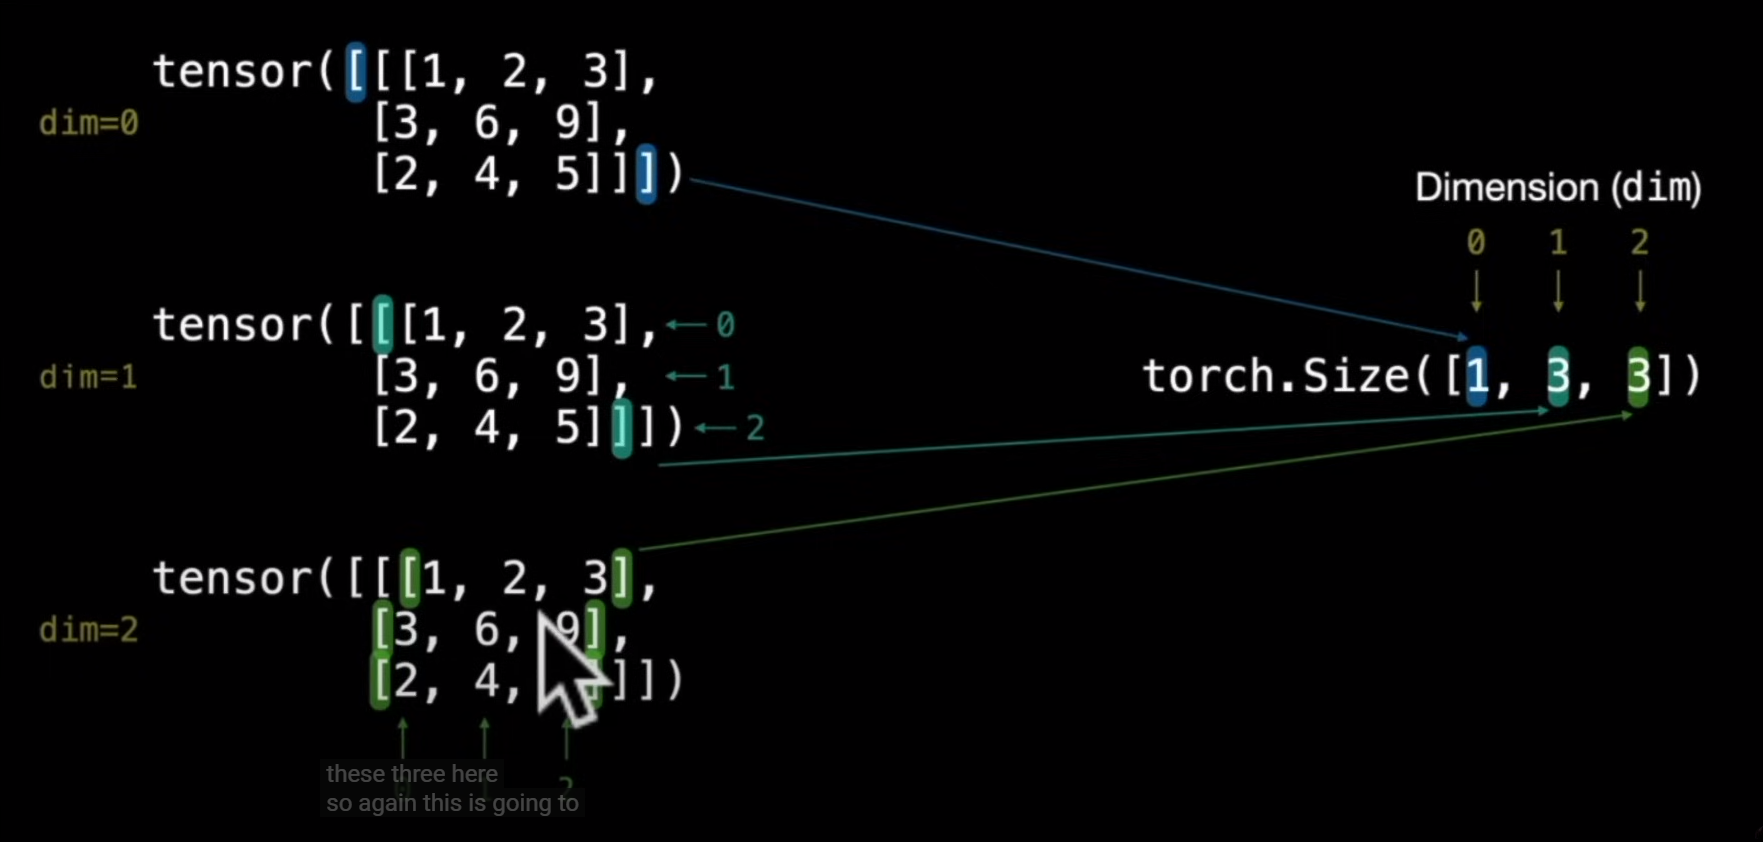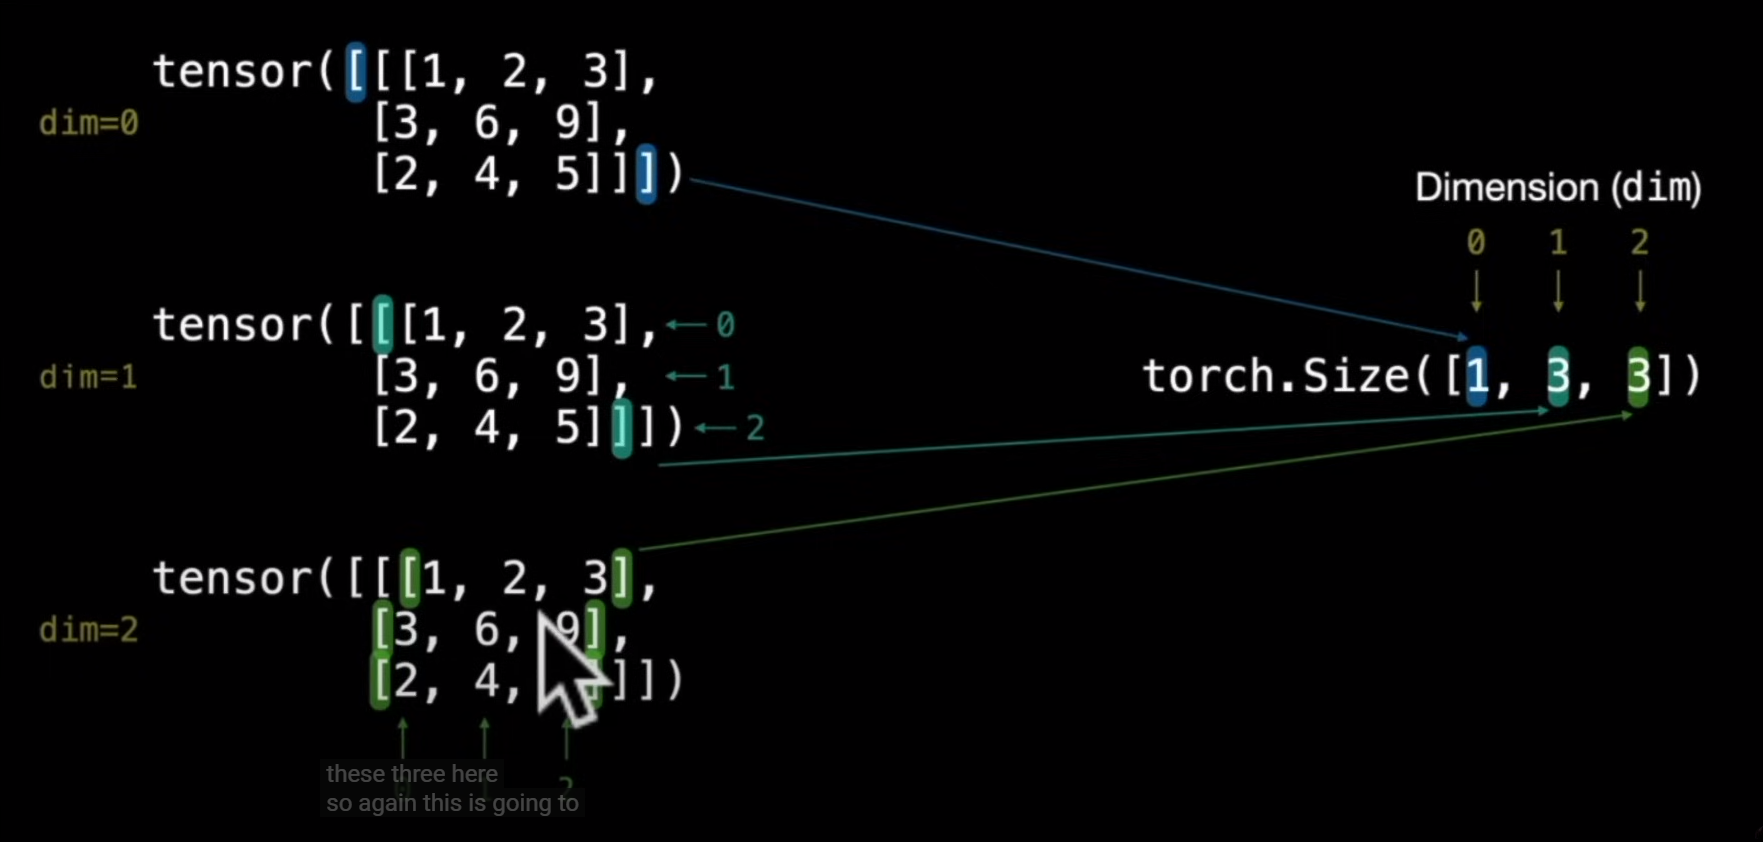)
if you have a question: https://github.com/mrdbourke/pytorch-deep-learning/discussions?page=1

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.2.1+cu121


In [ ]:
!nvidia-smi
#we now have access to GPU

/bin/bash: line 1: nvidia-smi: command not found


##Introduction to tensors
### Creating tensors
PyTorch tensors are created using 'torch.Tensor()' = https://pytorch.org/docs/stable/tensors.html;

In [ ]:
#scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
#conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch

In [ ]:
scalar.ndim

0

In [ ]:
#Get tensor back as PYthon int
scalar.item()

7

In [ ]:
#Vector: vector has magnitude and direction
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# Matrix
MATRIX = torch.tensor([[7,8],[9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[1]

tensor([ 9, 10])

In [ ]:
MATRIX.shape

torch.Size([2, 2])

In [ ]:
Tensor = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])
Tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
Tensor.ndim

3

In [ ]:
Tensor.shape

torch.Size([1, 3, 3])

In [ ]:
Tensor[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

# New Section


Alright, it outputs torch.Size([1, 3, 3]).

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.



In [ ]:
Tensor1 = torch.tensor([[1,2,3],
                        [3,6,9],
                        [2,4,5]])


In [ ]:
Tensor1.ndim

2

In [ ]:
Tensor1.shape

torch.Size([3, 3])

In [ ]:
Tensor1[0]

tensor([1, 2, 3])

##2. Create a random tensor with shape (7, 7).

In [ ]:
Tensor2= torch.rand((7,7))
Tensor2

tensor([[0.9245, 0.1139, 0.8708, 0.8944, 0.6335, 0.7154, 0.0258],
        [0.9202, 0.6571, 0.4447, 0.9418, 0.4997, 0.4821, 0.7028],
        [0.6284, 0.1071, 0.5807, 0.5183, 0.3641, 0.6269, 0.0962],
        [0.6286, 0.0194, 0.4389, 0.7037, 0.5292, 0.0803, 0.3769],
        [0.9039, 0.4332, 0.3081, 0.9451, 0.6738, 0.2252, 0.2408],
        [0.3155, 0.1320, 0.3853, 0.0332, 0.2064, 0.6260, 0.3566],
        [0.1793, 0.7817, 0.8364, 0.4239, 0.9217, 0.6821, 0.5195]])

In [ ]:
Tensor2.shape

torch.Size([7, 7])

##3. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).

In [ ]:
Tensor3= torch.rand((1,7))
Z=torch.mm(Tensor2,Tensor3.t())
Z, Z.shape

(tensor([[1.9616],
         [1.8755],
         [1.2473],
         [1.4836],
         [1.7907],
         [0.6509],
         [1.7189]]),
 torch.Size([7, 1]))

##4. Set the random seed to 0 and do 2 & 3 over again.

In [ ]:
torch.manual_seed(0)

In [ ]:
Tensor2= torch.torch.rand((7,7))
Tensor3= torch.torch.rand((1,7))
Z=torch.mm(Tensor2,Tensor3.t())
Z, Z.shape

(tensor([[1.8542],
         [1.9611],
         [2.2884],
         [3.0481],
         [1.7067],
         [2.5290],
         [1.7989]]),
 torch.Size([7, 1]))

##5. Speaking of random seeds, we saw how to set it with torch.manual_seed() but is there a GPU equivalent? (hint: you'll need to look into the documentation for torch.cuda for this one)


*   If there is, set the GPU random seed to 1234.




In [ ]:
torch.manual_seed(1234)

##6. Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed). The output should be something like:



*   Device: cuda
(tensor([[0.0290, 0.4019, 0.2598],[0.3666, 0.0583, 0.7006]], device='cuda:0'),<br> tensor([[0.0518, 0.4681, 0.6738],[0.3315, 0.7837, 0.5631]], device='cuda:0'))




In [ ]:
import torch
# Set random seed
torch.manual_seed(1234)

# Check for access to GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

# Create two random tensors on GPU
tensor_A = torch.rand(size=(2,3)).to(device)
tensor_B = torch.rand(size=(2,3)).to(device)
tensor_A, tensor_B

Device: cpu


(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]]),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]]))

##7. Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).

In [ ]:
Z=torch.mm(tensor_A,tensor_B.t())
Z, Z.shape

(tensor([[0.3647, 0.4709],
         [0.5184, 0.5617]]),
 torch.Size([2, 2]))

#8. Find the maximum and minimum values of the output of 7.

In [ ]:
# Find max
torch.max(Z)

tensor(0.5617)

In [ ]:
#Find min
torch.min(Z)

tensor(0.3647)

##9. Find the maximum and minimum index values of the output of 7.

In [ ]:
#index value of maximum value of z
arg_max = torch.argmax(Z)

#index value of minimum value of z
arg_min = torch.argmin(Z)
arg_max, arg_min

(tensor(3), tensor(0))

##10. Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

In [ ]:
# Set random seed
torch.manual_seed(7)

In [ ]:
#create random vector
Tensor = torch.rand(size=(1, 1, 1, 10)).to(device)
Tensor, Tensor.shape

(tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
            0.3653, 0.8513]]]]),
 torch.Size([1, 1, 1, 10]))

In [ ]:
Tensor.ndim

4

In [ ]:
# remove single dimensions
tensor_E = Tensor.squeeze()
tensor_E,tensor_E.shape

(tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
         0.8513]),
 torch.Size([10]))

In [ ]:
Tensor = torch.rand(size=(5,3,2,10)).to(device)
Tensor.ndim

4

In [ ]:
#Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(3,224,224)) #height , width, color channel(R, G, B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

In [ ]:
random_image_size_tensor

tensor([[[0.8274, 0.0184, 0.1285,  ..., 0.8451, 0.3922, 0.1205],
         [0.7872, 0.7774, 0.5811,  ..., 0.9845, 0.8254, 0.2984],
         [0.1958, 0.2105, 0.9702,  ..., 0.9447, 0.6696, 0.9955],
         ...,
         [0.1409, 0.1803, 0.3040,  ..., 0.6783, 0.7986, 0.2713],
         [0.5113, 0.5833, 0.9563,  ..., 0.3604, 0.8456, 0.3803],
         [0.6137, 0.2658, 0.1118,  ..., 0.4679, 0.1190, 0.2100]],

        [[0.5480, 0.0648, 0.2980,  ..., 0.5861, 0.1996, 0.3087],
         [0.7142, 0.2881, 0.2391,  ..., 0.7678, 0.4889, 0.7328],
         [0.4727, 0.0011, 0.3420,  ..., 0.1329, 0.9062, 0.3504],
         ...,
         [0.7579, 0.9473, 0.1982,  ..., 0.3946, 0.2388, 0.2065],
         [0.8691, 0.7709, 0.4299,  ..., 0.4955, 0.1753, 0.7803],
         [0.7342, 0.8812, 0.1107,  ..., 0.4151, 0.8654, 0.6091]],

        [[0.7867, 0.5098, 0.3390,  ..., 0.6222, 0.6601, 0.6713],
         [0.9281, 0.0511, 0.2967,  ..., 0.1269, 0.2673, 0.9897],
         [0.3410, 0.1096, 0.2761,  ..., 0.0031, 0.6229, 0.

#Zeros and ones

In [ ]:
#create a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
#create a tensor of all ones
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
ones.dtype

torch.float32

# Creating a range of tensors and tensors-like

In [ ]:
torch.range(0,10)

<ipython-input-43-dfdec9b83f7d>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(0,10)


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [ ]:
one_to_ten = torch.arange(0,11)
one_to_ten

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
one_to_ten = torch.arange(start=0,end=1000, step=77)
one_to_ten

tensor([  0,  77, 154, 231, 308, 385, 462, 539, 616, 693, 770, 847, 924])

In [ ]:
one_to_ten = torch.arange(start=1,end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Creating tensor like
ten_zeros = torch.ones_like(input=one_to_ten)
ten_zeros

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Creating tensor like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

###Random tensors

Random tensors are important because the way many neural networks learn is that  they start with tensors ful of random numbers and then adjust those random numbers to better represent the data.<br>

Start with random numbers--> look at data--> update randum numbers-->look at data-->update randum numbers


In [ ]:
# create a random tensor of size (3,4)
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.6732, 0.8663, 0.3702, 0.6628],
        [0.7196, 0.5046, 0.5103, 0.8240],
        [0.3511, 0.8840, 0.1788, 0.3565]])

In [ ]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(3,224,224))# height ,width, color channel
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

In [ ]:
random_image_size_tensor

tensor([[[0.8360, 0.1634, 0.5351,  ..., 0.4844, 0.6353, 0.3278],
         [0.1325, 0.1910, 0.2313,  ..., 0.3945, 0.8115, 0.9269],
         [0.0253, 0.0849, 0.6913,  ..., 0.2937, 0.7944, 0.8104],
         ...,
         [0.6359, 0.8536, 0.7921,  ..., 0.5003, 0.9316, 0.9189],
         [0.9307, 0.6047, 0.3742,  ..., 0.9912, 0.8602, 0.9218],
         [0.1309, 0.8292, 0.8237,  ..., 0.3112, 0.5390, 0.7738]],

        [[0.4206, 0.0524, 0.0254,  ..., 0.0103, 0.6097, 0.7990],
         [0.2398, 0.2124, 0.5882,  ..., 0.7568, 0.3806, 0.2505],
         [0.3942, 0.2075, 0.9351,  ..., 0.6055, 0.5109, 0.7165],
         ...,
         [0.9875, 0.0532, 0.9455,  ..., 0.6248, 0.9365, 0.5566],
         [0.2771, 0.8908, 0.8559,  ..., 0.8006, 0.2619, 0.5966],
         [0.1490, 0.0065, 0.0998,  ..., 0.8161, 0.5369, 0.2066]],

        [[0.8093, 0.1609, 0.0688,  ..., 0.3604, 0.7245, 0.7181],
         [0.2208, 0.6994, 0.4912,  ..., 0.9946, 0.8334, 0.6397],
         [0.5863, 0.2346, 0.1944,  ..., 0.2431, 0.0885, 0.

In [ ]:
random_image_size_tensor.dtype

torch.float32

### Tensor datatypes <br>

**Note:** Tensor datatypes is one of the 3 big errors you will run into with PyTorch & deep learning:<br>
1. Tensors not right datatype. <br>
2. Tensors not right shape. <br>
3. Tensors not on the right device. <br>

Precision in Computing --> https://en.wikipedia.org/wiki/Single-precision_floating-point_format

In [ ]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], dtype = None)
# even the datatype was decided to be None, it is float32
float_32_tensor.dtype

torch.float32

In [ ]:
# Float 16 tensor
float_16_tensor = torch.tensor([3.0, 6.0, 9.0], dtype = torch.float16)
# even the datatype was decided to be None, it
float_16_tensor.dtype

torch.float16

In [ ]:
# Float 16 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype = None,# What data type is the tensor (e.g. float32 or float 16)
                               device = None, # what device is your tensor on
                               requires_grad=False) #whether or not to track gradients with this tensor operations
# even the datatype was decided to be None, it
float_32_tensor.dtype

torch.float32

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor.dtype

torch.float16

In [ ]:
float_16_tensor*float_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_32_tensor = torch.tensor([3,6,9], dtype = torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
float_32_tensor*int_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_64_tensor = torch.tensor([3,6,9], dtype = torch.int64)
int_64_tensor

tensor([3, 6, 9])

In [ ]:
float_32_tensor*int_64_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_long_tensor = torch.tensor([3,6,9], dtype = torch.long)
int_long_tensor

tensor([3, 6, 9])

In [ ]:
float_32_tensor*int_long_tensor

tensor([ 9., 36., 81.])

### Getting information from tensors (tensor attributes)

1. Tensors not right datatype- to do get datatype from a tensor, can use 'tensor.dtype' <br>
2. Tensors not right shape- to get shape from a tensor, can use 'tensor.shape' <br>
3. Tensors not on the right device- to get device from a tensor, can use 'tensor.device' <br>

In [ ]:
# create a tensor
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.6330, 0.7360, 0.8204, 0.9645],
        [0.0521, 0.1167, 0.1645, 0.4530],
        [0.4274, 0.0783, 0.9954, 0.4467]])

In [ ]:
# Find out details about some tensor
print(some_tensor)
print(f"Datatype of a tensor: {some_tensor.dtype}")

tensor([[0.6330, 0.7360, 0.8204, 0.9645],
        [0.0521, 0.1167, 0.1645, 0.4530],
        [0.4274, 0.0783, 0.9954, 0.4467]])
Datatype of a tensor: torch.float32


In [ ]:
some_tensor.size(), some_tensor.shape

(torch.Size([3, 4]), torch.Size([3, 4]))

In [ ]:
print(f"Datatype of a tensor: {some_tensor.shape}")
print(f"Datatype of a tensor: {some_tensor.device}")

Datatype of a tensor: torch.Size([3, 4])
Datatype of a tensor: cpu


### Manipulating Tensors (tensor operations)

Tensor operations include:
* Addition <br>
*Substraction <br>
* Multiplication (element-wise)<br>
*Division <br>
*Matrix Multiplication<br>

In [ ]:
#create a tensor and add 10 to it
tensor = torch.tensor([1,2,3])
tensor+10

tensor([11, 12, 13])

In [ ]:
# Multiply tensor by 10
tensor*10

tensor([10, 20, 30])

In [ ]:
tensor

tensor([1, 2, 3])

In [ ]:
# substract 10
tensor-10

tensor([-9, -8, -7])

In [ ]:
# try out Pytorch in-built functions
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [ ]:
torch.add(tensor,10)

tensor([11, 12, 13])

### Matrix Multiplication

Two main ways of performing multiplication in neural network and deep Learning:<br>

1. Element-wise multiplication
2. Matrix multiplication (dot product) <br>

More information on multiplying matrices - https://www.mathsisfun.com/algebra/matrix-multiplying.html

There are two main rules that performing matrix multiplication  needs to satisfy:<br>

1. The **inner dimensions** must match:
* `(3,2) @ (3,2)`   won't work
* `(2,3) @ (3,2)`   will work
* `(3,2) @ (2,3)`   will work
2. The resulting matrix has the shape of outer dimension.
* `(2,3) @ (3,2)`--> `(2,2)`
* `(3,2) @ (2,3)`--> `(3,3)`


In [ ]:
torch.matmul(torch.rand(3,2), torch.rand(2,3)).shape

torch.Size([3, 3])

In [ ]:
#Element-wise multiplication
print(tensor,'*', tensor)
print(f"Equals:{tensor*tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals:tensor([1, 4, 9])


In [ ]:
# Matrix multiplication
%%time
torch.matmul(tensor, tensor)

CPU times: user 393 µs, sys: 1.04 ms, total: 1.43 ms
Wall time: 7.71 ms


tensor(14)

In [ ]:
# Matrix multiplication by hand
1*1 +2*2 + 3*3

14

In [ ]:
# alternatively
tensor@tensor

tensor(14)

In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] *tensor[i]
value

CPU times: user 2.09 ms, sys: 15 µs, total: 2.1 ms
Wall time: 3.73 ms


tensor(14)

### One of the most common errors in deep learning: shape errors

In [ ]:
tensor_A = torch.tensor([[1,2],
                        [3,4],
                        [5,6]])

tensor_B = torch.tensor([[7,10],
                        [8,11],
                        [9,12]])
# torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul (it's an alias for writing less code)
torch.matmul(tensor_A, tensor_B)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix out tensor shape issue, we can manipulate the shape of our tensors using a **transpose** <br>

A **transpose** switches the axes or dimensions of a given tensor.


In [ ]:
# The matrix multiplication operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above),  tensor_B.T = {tensor_B.T.shape}")
print(f"Multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <-- inner dimension must match")
print("output:\n")
output=torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]) (same as above),  tensor_B.T = torch.Size([2, 3])
Multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <-- inner dimension must match
output:

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


###Finding the min, max, mean, sum etc(tensor aggregation)

In [ ]:
x = torch.arange(0,100,10)
x, x.dtype

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), torch.int64)

In [ ]:
#finding the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
#finding the min
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
#finding the mean - note: the torch.mean() function requires a tensor of float32 data type to work
torch.mean(x.type(torch.float32)),x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [ ]:
x.type(), x.type(torch.float32).type()

('torch.LongTensor', 'torch.FloatTensor')

In [ ]:
#finding the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

##Finding the positional min and max

In [ ]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# find the index position of a min number in a tensor
x.argmin()

tensor(0)

In [ ]:
# find the index position of a max number in a tensor
x.argmax()

tensor(9)

## Reshaping , stacking, squeezing, and unsqueezing tensors <br>

*Reshaping - reshapes an input tensor to a defined shape <br>
*View - Return a view of an input tensor of certain shape but keep the same memory as the original tensor.
* Stacking - combine multiple tensors on top of each other (vstack) or side by side(hstack)
* Squeeze - removess all `1` dimensions from a tensor.
* Unsqueeze - add a `1` dimension to a target tensor.
* Permute - Return a view of the input with dimensions permuted (swapped) in a certain way.


In [ ]:
# Let's create a tensor
import torch
x = torch.arange(1.,10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1,9)
#x_reshaped = x.reshape(3,3)
#x_reshaped = x.reshape(9,1)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# change the View
z = x.view(1,9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
#here i make changes in the 0th index of z and 0th index of 'x' has also changed
z[:,0]=5
z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x], dim=1)
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

## Torch.squeeze() - removes all single dimensions from a target tensor

In [ ]:
x_reshaped, x_reshaped.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# torch.squeeze()- removes all single dimensions from a target tensor
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\n New Tensor: {x_squeezed}")
print(f"\n New Shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

 New Tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])

 New Shape: torch.Size([9])


In [ ]:
##torch.unsqueeze() - adds a single dimension to a target tensor at a specific dimension
print(f"Previous target: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\n New Tensor: {x_unsqueezed}")
print(f"\n New Shape: {x_unsqueezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = x_unsqueezed.unsqueeze(dim=0)
print(f"\n New unsqueezed Tensor: {x_unsqueezed}")
print(f"\n New unsqueezed Shape: {x_unsqueezed.shape}")

Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

 New Tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])

 New Shape: torch.Size([1, 9])

 New unsqueezed Tensor: tensor([[[5., 2., 3., 4., 5., 6., 7., 8., 9.]]])

 New unsqueezed Shape: torch.Size([1, 1, 9])


In [ ]:
##torch.unsqueeze() - adds a single dimension to a target tensor at a specific dimension
print(f"Previous target: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=1)
print(f"\n New Tensor: {x_unsqueezed}")
print(f"\n New Shape: {x_unsqueezed.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = x_unsqueezed.unsqueeze(dim=1)
print(f"\n New unsqueezed Tensor: {x_unsqueezed}")
print(f"\n New unsqueezed Shape: {x_unsqueezed.shape}")

Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

 New Tensor: tensor([[5.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

 New Shape: torch.Size([9, 1])

 New unsqueezed Tensor: tensor([[[5.]],

        [[2.]],

        [[3.]],

        [[4.]],

        [[5.]],

        [[6.]],

        [[7.]],

        [[8.]],

        [[9.]]])

 New unsqueezed Shape: torch.Size([9, 1, 1])


In [ ]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
x_original = torch.rand(size= (224,224,3)) # [height, width color_channel]
#x_original

#Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2,0,1) # shift axis 0-->1, 1-->2,2-->0

print(f"Previous shape: {x_original.shape}")

print(f"Previous shape: {x_permuted.shape}")# [color_channel,height, width]

Previous shape: torch.Size([224, 224, 3])
Previous shape: torch.Size([3, 224, 224])


remember permute is a view and view shares the same memory as the original tensor. so x_permuted will share the same place in memory as x_original even though it's from a different shape

In [ ]:
x_original[0,0,0] = 0.85624
x_permuted[0,0,0]

tensor(0.8562)

###Indexing (Selecting data from tensors)

Indexing with PyTorch is similar to indexing with NumPy

In [ ]:
# Create a tensor
import torch
x= torch.arange(1,10).reshape(1,3,3)
x, x.shape


(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
x[0][0]

tensor([1, 2, 3])

In [ ]:
x[0,0]

tensor([1, 2, 3])

In [ ]:
# Let's index on the most inner bracket (last dimension)
x[0,0,0]

tensor(1)

In [ ]:
x[0][0][0]

tensor(1)

In [ ]:
x[0][2][2]

tensor(9)

In [ ]:
# You can also use ":" to select "all" of a target dimension
x[:,0]

tensor([[1, 2, 3]])

In [ ]:
# Get all the values of 0th and 1st dimensions but only index 1 of 2nd dimension
x[:,:,2]

tensor([[3, 6, 9]])

In [ ]:
x[:,:]

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
# get all the values of the 0th dimension but only the 1 index value of the 1st and 2nd dimension
x[:,1,1]

tensor([5])

In [ ]:
# get all the values of the 0th dimension but only the 1 index value of the 1st and 2nd dimension
x[0,1,1]

tensor(5)

In [ ]:
# get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0,0,:]

tensor([1, 2, 3])

In [ ]:
x[0,:,1]

tensor([2, 5, 8])

In [ ]:
# index on x to return 9
x[:,2,2]


tensor([9])

In [ ]:
# index on x to return 3,6,9
x[:,:,2]

tensor([[3, 6, 9]])

## PyTorch tensors & NumPy

NumPy is a popular scientific Python numerical computing library. And because of this, PyTorch has functionality to interact with it.<br>

* Data in MumPy, want in PyTorch tensor --> `torch.from_numpy(ndarray)` <br>
* PyTorch tensor --> NumPy--> `torch.Tensor.numpy()`


In [157]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
#tensor = torch.from_numpy(array).type(torch.float32)
#warning: when converting from numpy --> PyTorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise.
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [158]:
tensor.dtype

torch.float64

In [161]:
array.dtype
# this is default data type of Numpy array

dtype('float64')

In [159]:
torch.arange(1.,8.).dtype
#this is a default data type of PyTorch

torch.float32

In [160]:
#change the value of array, what will this do to `tensor`?
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [163]:
# Tensor to NumPy array.
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor.dtype, numpy_tensor.dtype

(torch.float32, dtype('float32'))

In [164]:
# Change the tensor, what happens to `numpy_tensor`?
tensor = tensor +1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (Trying to take random out of random) <br>

`Start with random numbers --> Tensor operations --> update random numbers to try and make them better representations of the data--> again-->again-->again...`
To reduce the randomness in neural networks and PyTorch comes the concept of a **random seed**.<br>
Essentially what the random seed does is "flavour" the randomness.


In [166]:
import torch

#create two random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)

print(random_tensor_A==random_tensor_B)

tensor([[0.5944, 0.2570, 0.9850, 0.4779],
        [0.7026, 0.4343, 0.1340, 0.9311],
        [0.0830, 0.1041, 0.2154, 0.2731]])
tensor([[0.2672, 0.3116, 0.6774, 0.0274],
        [0.1993, 0.0685, 0.9796, 0.9879],
        [0.7353, 0.8944, 0.3338, 0.9058]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [168]:
#Let's make some random but reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)

print(random_tensor_C==random_tensor_D)


tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


###Extra resources for reproducibility
* https://pytorch.org/docs/stable/notes/randomness.html
*https://en.wikipedia.org/wiki/Random_seed

## Running tensors and PyTorch objects on the GPUs (and making faster computations)

GPUs = faster coputation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make every thing hunky dory(good)

### 1. Getting a GPU <br>

1. Easiest - Use Google Colab for a free GPU (Options to upgrade as well)
2. Use Your own GPU - take a little bit of setup and requires the investment of purchasing, there's alots of options..., seethis post for whaz option to get: https://timdettmers.com/category/deep-learning/<br>
3. Use Cloud computing- GCP, AWS, Azure, these services allow you to rent computers on the cloud and access them. <br>

For 2,3 PyTorch + GPU drivers (CUDA) takes a litte bit of setting up, to do this, refer to PyTorch setup documentation : https://pytorch.org/get-started/locally/

In [8]:
!nvidia-smi

Sun Apr 14 16:48:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 2. Check for GPU access with PyTorch

In [9]:
# Check for GPU access with PyTorch

import torch
torch.cuda.is_available()

True

For PyTorch since it's capable of running compute on the GPU or CPU, it's best practice to setup device agnostic code: https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code

E.g. run on GPU if available, else default to CPU

In [10]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [11]:
# Count number of devices
torch.cuda.device_count()

1

## 3. Putting tensors (and models) on the GPU

The reason we want our tensors/models on the GPU is because using a GPU results in faster computations

In [12]:
# create a tensor (default on the CPU)
tensor=torch.tensor([1,2,3])

#tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [13]:
# Move tensor to GPU (if available)

tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the CPU

In [17]:
# If tensor is on GPU, cannot transform it to NumPy. NumPy only works with CPU
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [15]:
# To fix the GPU tensor with NumPy issue, we can first set it to the CPU.
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [16]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')